In [1]:
import pandas as pd

[Experiment query](https://www.encodeproject.org/report/?type=Experiment&control_type!=*&status=released&perturbed=false&assay_title=scRNA-seq&assay_title=long+read+RNA-seq&award.project=ENCODE&award.rfa=ENCODE4&biosample_ontology.classification!=technical+sample&assay_title=total+RNA-seq&assay_title=polyA+plus+RNA-seq)

In [20]:
df =  pd.read_csv('flagship_exp_report.tsv', sep='\t', skiprows=[0])

In [21]:
df.head()

,ID,Accession,Assay name,Assay title,Target,Target of assay,Target gene symbol,Biosample summary,Biosample term name,Dbxrefs,...,Synchronization,Post-synchronization time,Post-synchronization time units,Biosample modification site target organism,Biosample modification site introduced gene organism,Replicates,Mixed biosamples,Cellular component,Library construction platform,Library construction method
0,/experiments/ENCSR834DQL/,ENCSR834DQL,long read RNA-seq,long read RNA-seq,NaN,NaN,NaN,Homo sapiens HepG2,HepG2,GEO:GSE143133,...,NaN,NaN,NaN,NaN,NaN,/replicates/d0efdadd-75ab-491f-b921-16f09bc9a7...,NaN,NaN,NaN,NaN
1,/experiments/ENCSR983KDL/,ENCSR983KDL,long read RNA-seq,long read RNA-seq,NaN,NaN,NaN,Homo sapiens K562,K562,GEO:GSE175347,...,NaN,NaN,NaN,NaN,NaN,/replicates/4923d2e7-6d0e-4215-b61a-fd4c42258f...,NaN,NaN,NaN,NaN
2,/experiments/ENCSR810XLL/,ENCSR810XLL,long read RNA-seq,long read RNA-seq,NaN,NaN,NaN,Homo sapiens MCF-7,MCF-7,GEO:GSE175197,...,NaN,NaN,NaN,NaN,NaN,/replicates/d72b8196-8c13-4b8b-abb0-dc8fb3eada80/,NaN,NaN,NaN,NaN
3,/experiments/ENCSR947JHA/,ENCSR947JHA,long read RNA-seq,long read RNA-seq,NaN,NaN,NaN,Homo sapiens PC-3,PC-3,GEO:GSE175336,...,NaN,NaN,NaN,NaN,NaN,/replicates/5fbcc8c5-246d-430e-a9f7-85f798591f25/,NaN,NaN,NaN,NaN
4,/experiments/ENCSR526TQU/,ENCSR526TQU,long read RNA-seq,long read RNA-seq,NaN,NaN,NaN,Homo sapiens K562,K562,GEO:GSE174877,...,NaN,NaN,NaN,NaN,NaN,/replicates/bc365efb-c356-4c3f-afea-664bca20566b/,NaN,NaN,NaN,NaN


In [22]:
cols = ['Biosample term name', 
        'Biosample accession',
        'Assay title']
df = df[cols]

In [26]:
df['Biosample accession'] = df['Biosample accession'].str.split(',')

In [27]:
df = df.explode(column='Biosample accession')

In [29]:
# groupby same biosamples 
df = df.groupby(['Biosample term name', 'Biosample accession']).agg({'Assay title': ','.join}).reset_index()

In [30]:
df

,Biosample term name,Biosample accession,Assay title
0,A549,ENCBS039KEI,total RNA-seq
1,A549,ENCBS074AEV,total RNA-seq
2,A549,ENCBS076KCC,total RNA-seq
3,A549,ENCBS087PCF,total RNA-seq
4,A549,ENCBS103UWX,total RNA-seq
...,...,...,...
1157,upper lobe of right lung,ENCBS496CPG,"long read RNA-seq,total RNA-seq"
1158,ureter,ENCBS604WKC,total RNA-seq
1159,ureter,ENCBS779XQT,scRNA-seq
1160,uterus,ENCBS067MIE,scRNA-seq


In [31]:
import upsetplot
up_df = upsetplot.from_memberships(df['Assay title'].str.split(','), data=df)

In [32]:
up_df

Biosample term name  \
long read RNA-seq polyA plus RNA-seq scRNA-seq total RNA-seq                             
False             False              False     True                               A549   
                                               True                               A549   
                                               True                               A549   
                                               True                               A549   
                                               True                               A549   
...                                                                                ...   
True              False              False     True           upper lobe of right lung   
False             False              False     True                             ureter   
                                     True      False                            ureter   
                                               False                            uterus   
                                     False     True                             uterus   

                                                             Biosample accession  \
long read RNA-seq polyA plus RNA-seq scRNA-seq total RNA-seq                       
False             False              False     True                  ENCBS039KEI   
                                               True                  ENCBS074AEV   
                                               True                  ENCBS076KCC   
                                               True                  ENCBS087PCF   
                                               True                  ENCBS103UWX   
...                                                                          ...   
True              False              False     True                  ENCBS496CPG   
False             False              False     True                  ENCBS604WKC   
                                     True      False                 ENCBS779XQT   
                                               False                 ENCBS067MIE   
                                     False     True                  ENCBS178VYX   

                                                                                  Assay title  
long read RNA-seq polyA plus RNA-seq scRNA-seq total RNA-seq                                   
False             False              False     True                             total RNA-seq  
                                               True                             total RNA-seq  
                                               True                             total RNA-seq  
                                               True                             total RNA-seq  
                                               True                             total RNA-seq  
...                                                                                       ...  
True              False              False     True           long read RNA-seq,total RNA-seq  
False             False              False     True                             total RNA-seq  
                                     True      False                                scRNA-seq  
                                               False                                scRNA-seq  
                                     False     True                             total RNA-seq  

[1162 rows x 3 columns]

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x7fc0003e4dd0>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x7fbff0d8f750>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x7fbff0cf44d0>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x7fbff0dc3490>}

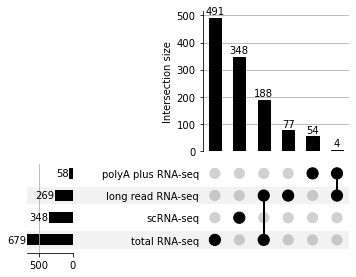

In [33]:
upsetplot.plot(up_df, subset_size='auto',
                    show_counts='%d', sort_by='cardinality')